In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [7]:
import sys, os
sys.path.append('../')
import glob

In [10]:
from rankutils.cfgloader import cfgloader
from rankutils.drawing import heatmap, annotate_heatmap

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
pathcfg = cfgloader("/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/path_2.cfg")
np.set_printoptions(linewidth=300)

In [28]:
def draw_balance(dkey):
    rlbls = ['# zeroes', '# ones', '# total']
    clbls = ['p. {0:02d}'.format(i) for i in range(1, 11)]

    labels = np.load(glob.glob(pathcfg['label'][dkey] + "*irp*")[0])
    fold_idx = np.load(glob.glob(pathcfg['rank'][dkey] + "*folds.npy")[0])
    _, rounds = fold_idx.shape

    fig, axes = plt.subplots(rounds, 2)
    fig.set_size_inches(12, 12)
    plt.tight_layout(h_pad=0.5)

    rd = 0
    for ax_pair in axes:
        ax0, ax1 = ax_pair

        idx_a = np.flatnonzero(fold_idx[:, rd] == 0).reshape(-1)
        idx_b = np.flatnonzero(fold_idx[:, rd] == 1).reshape(-1)

        table_a = np.zeros((3, 10), dtype=np.int32)
        table_b = np.zeros((3, 10), dtype=np.int32)
        n, k = labels.shape

        for i in range(k):
            r_labels = labels[:, i]
            r_labels_a = r_labels[idx_a]
            r_labels_b = r_labels[idx_b]

            total_a = r_labels_a.size
            total_b = r_labels_b.size

            zeroes_a = np.sum(r_labels_a == 0)
            ones_a = np.sum(r_labels_a == 1)

            zeroes_b = np.sum(r_labels_b == 0)
            ones_b = np.sum(r_labels_b == 1)

            table_a[0, i] = zeroes_a
            table_a[1, i] = ones_a
            table_a[2, i] = total_a

            table_b[0, i] = zeroes_b
            table_b[1, i] = ones_b
            table_b[2, i] = total_b

        im = heatmap(table_a, rlbls, clbls, ax=ax0, cbarlabel=None, title="Round {0:d} -- Fold 0".format(rd), 
                     cmap='Purples')
        texts = annotate_heatmap(im, valfmt="{x:d}", textcolors=['black', 'white'])

        im = heatmap(table_b, rlbls, clbls, ax=ax1, cbarlabel=None, title="Round {0:d} -- Fold 1".format(rd), 
                     cmap='Purples')
        texts = annotate_heatmap(im, valfmt="{x:d}", textcolors=['black', 'white'])

        rd += 1

## Places365_desc1

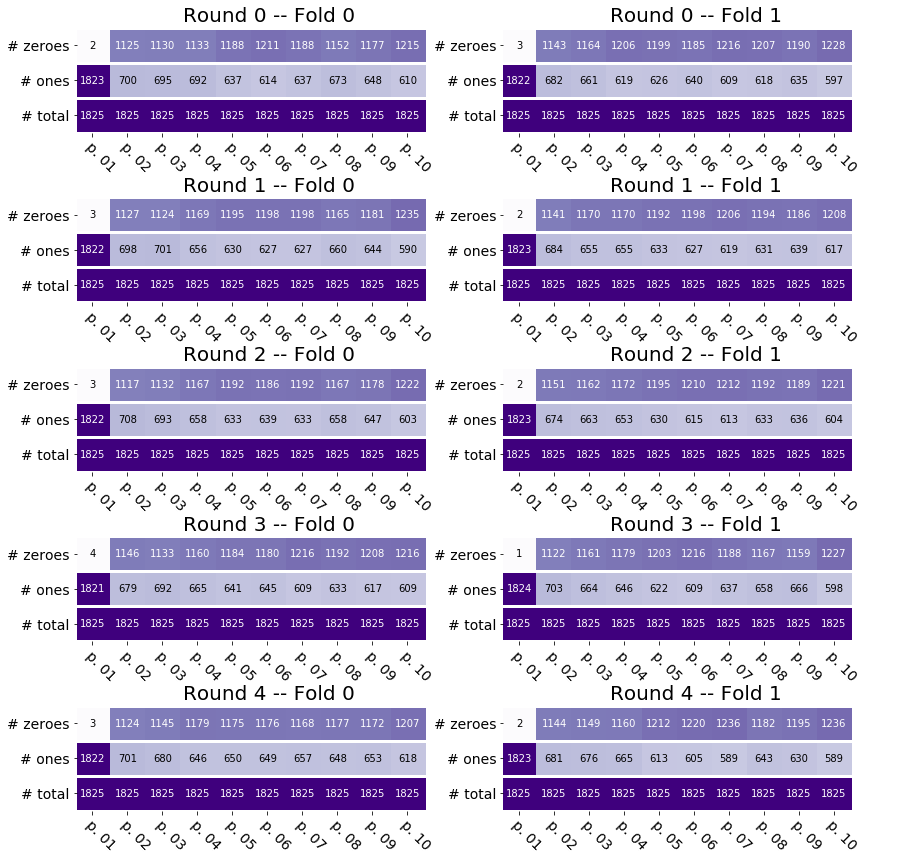

In [31]:
draw_balance("places365_desc1")

## Places365_desc2

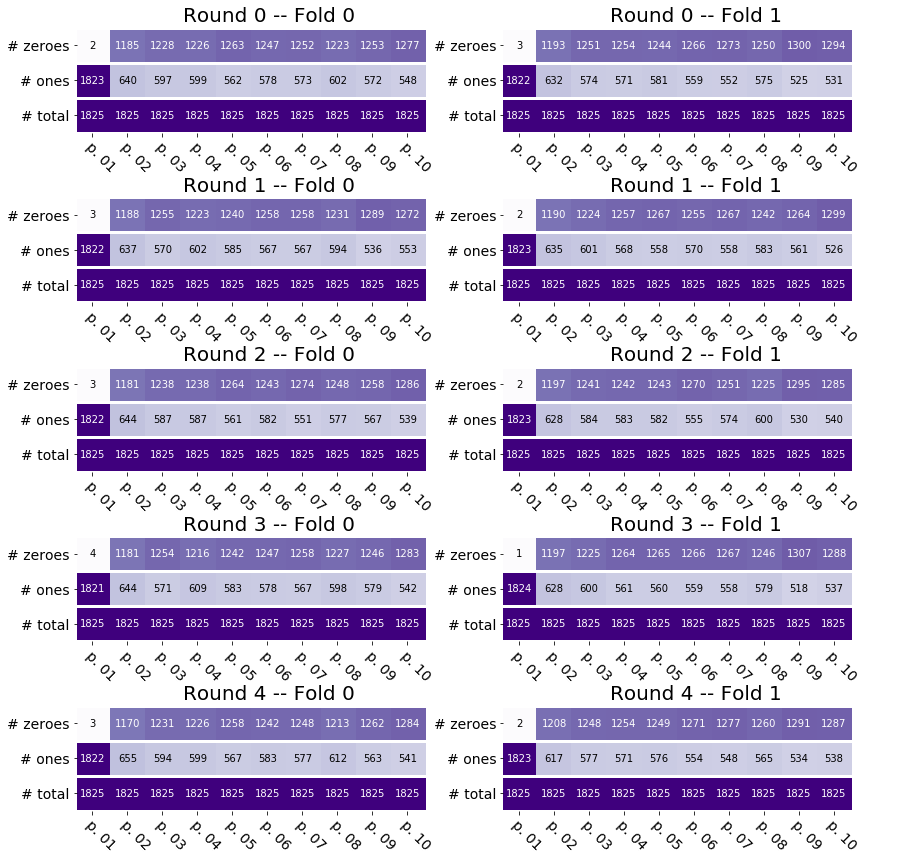

In [33]:
draw_balance('places365_desc2')

## Vggfaces_desc1

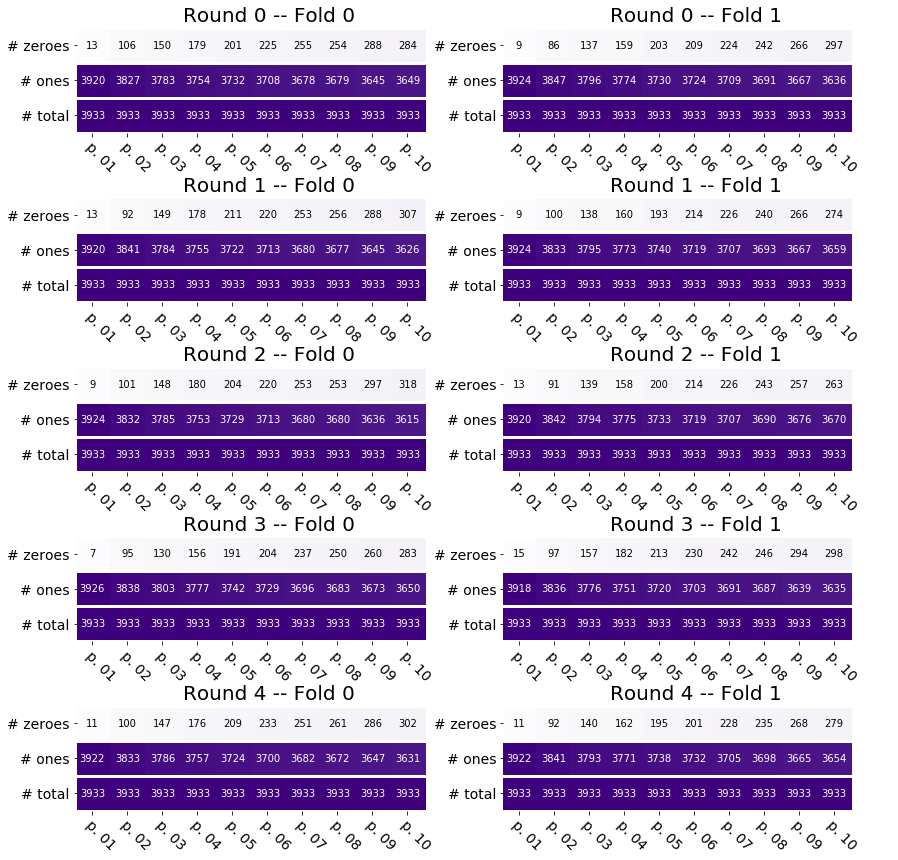

In [35]:
draw_balance('vggfaces_desc1')

## Vggfaces_desc2

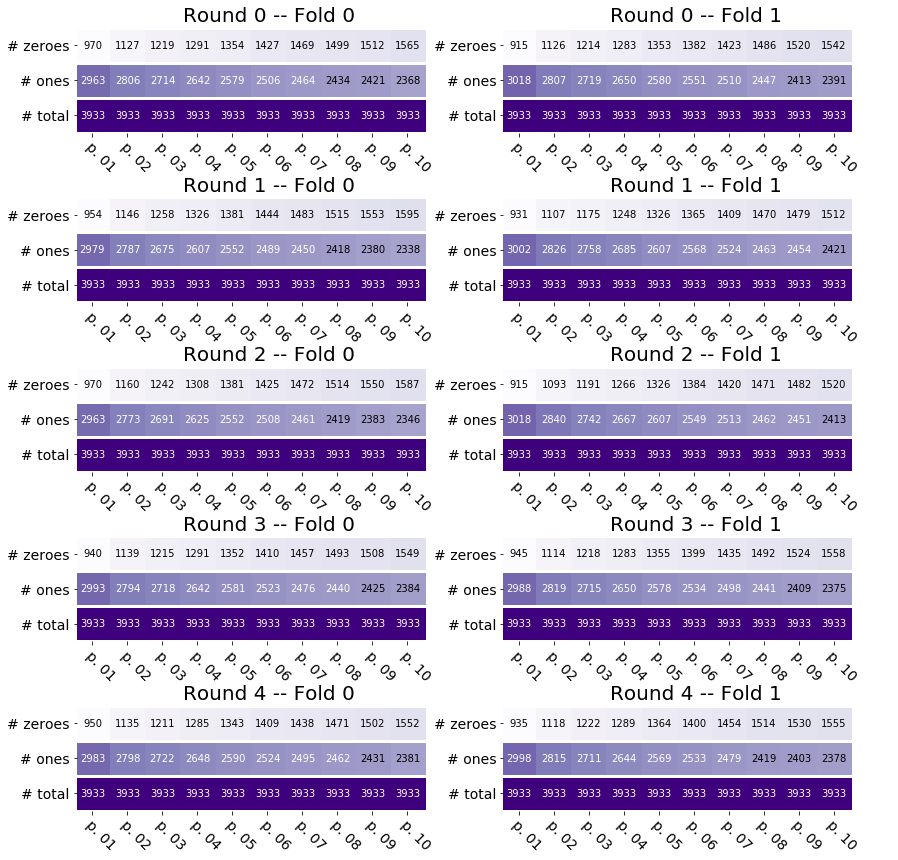

In [37]:
draw_balance('vggfaces_desc2')

## Imagenet_desc1

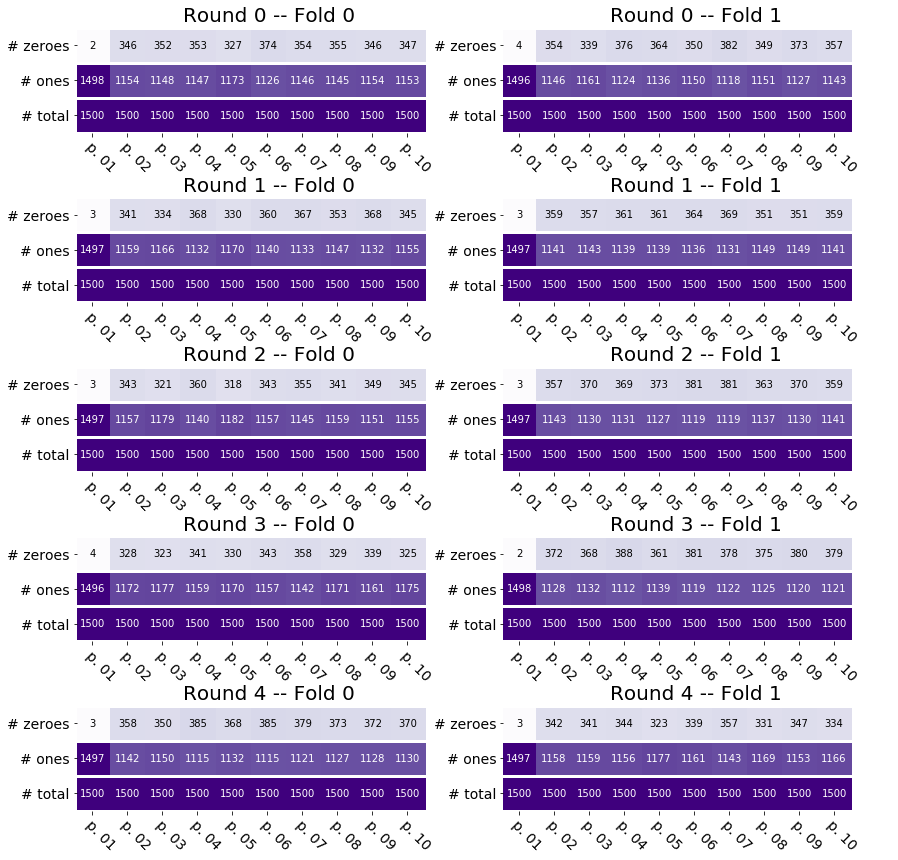

In [38]:
draw_balance('imagenet_desc1')